#Project 5
###Intro to Data Science
######*Chris Nolan*

1.Use the following data set: https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv

In [3]:
import pandas as pd
import numpy as np

wineData = pd.read_csv(" https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv")

wineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3345 entries, 0 to 3344
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          3345 non-null   object
 1   Alcohol_flag  3345 non-null   object
 2   Sugar_flag    3345 non-null   object
dtypes: object(3)
memory usage: 78.5+ KB


2.You will use the data set to demonstrate how we can use Naïve Bayes to classify a response variable. Specifically, we want to predict whether a wine is red or white based on whether the wine has high or low alcohol and sugar content.

3.Test for presence any missing attribute/target values and impute as necessary.

In [5]:
#Check for missing values before we start
print("\nThere are this many missing values:\n",wineData.isnull().sum())


There are this many missing values:
 Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64


4.Encode all categoric attributes (e.g. label encoding or ordinal encoding, etc.)

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_wineData = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, wineData.shape[1]):
    if wineData.dtypes[i]=='object' or wineData.dtypes[i]=='bool':
        encoded_wineData[wineData.columns[i]] = le.fit_transform(wineData[wineData.columns[i]])



print("-=========================")
print(wineData)
print("-=========================")
encoded_wineData

-=========================
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
-=========================


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


6.Create contingency tables (cross tabulations) for:\
a. Type vs. alcohol content\
b. Type vs. Sugar content

In [13]:
#Type vs. alcohol content
crossAlc = pd.crosstab(wineData['Type'], wineData['Alcohol_flag'], margins=False)

crossAlc

Alcohol_flag,High,Low
Type,,
Red,485,600
White,1176,1084


In [14]:
#Type vs. sugar content
crossSugar = pd.crosstab(wineData['Type'], wineData['Sugar_flag'], margins=False)

crossSugar

Sugar_flag,High,Low
Type,,
Red,237,848
White,1382,878


6.Plot the two cross tabulations obtained in Step 5.

Sugar Cross Tabulations


array([[<Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>]], dtype=object)

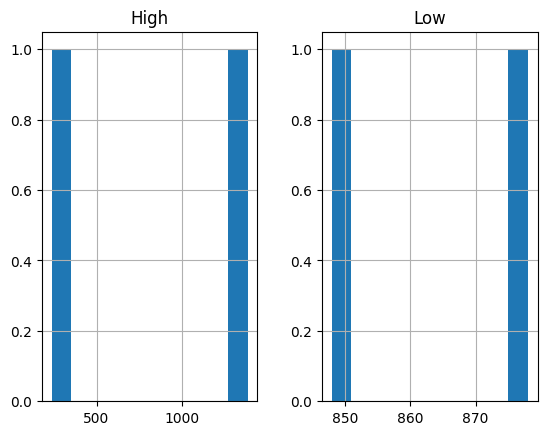

In [27]:
print('Sugar Cross Tabulations')
crossSugar.hist()

Alcohol Cross Tabulations


array([[<Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>]], dtype=object)

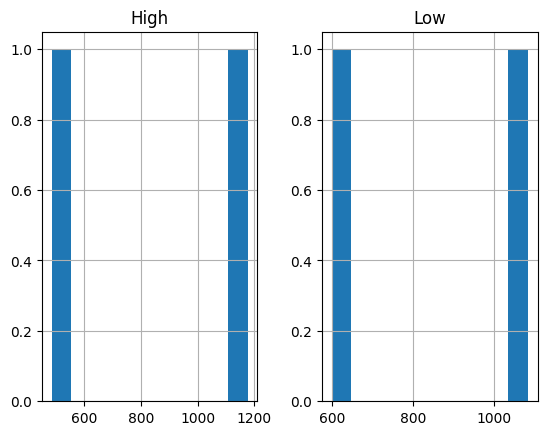

In [28]:
print('Alcohol Cross Tabulations')
crossAlc.hist()

7.Use the tables from the previous step to calculate:\
a. The prior probability of Type = Red and Type = White.\
b. The probability of high and low alcohol content.\
c. The probability of high and low sugar content.\
d. The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).\
e. The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).

a. Probability of a wine being Red is 1,084/3345=0.324 and white wine is 1-0.324=0.676\
b.Probability of a wine having high alcohol content is 1,661/3,345=0.497 and low alcohol content is 1-0.497=0.503\
c.Probability of a wine having high sugar content is 1,619/3,345=0.484 and low sugar content is 1-0.484=0.516\
d1.p(Alcohol_flag = High ∣ Type = Red) = (0.144*0.497)/0.324\
Solution = 0.22\
d2.p(Alcohol_flag = Low ∣ Type = Red) = (0.179*0.503)/0.324\
Solution = 0.28\
e1.p(Sugar_flag = High ∣ Type = Red) = (0.07*0.484)/0.324\
Solution = 0.10\
e2.p(Sugar_flag = Low ∣ Type = Red) = (0.253*0.516)/0.324\
Solution = 0.40

8.Create appropriate NB classifiers and record their accuracy on various training/test ratios, e.g., 80-20, 75-25, 70-30, 60-40, 50-50. Be sure to shuffle and stratify the data sets.

In [36]:
# Generating various Naive Bayes models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.model_selection import train_test_split

# Create a Gaussian NB Classifier. Note that each NB algorithm expects different types of data.
#   MultinomialNB → Applied to text data.
#   BernoulliNB → When you have binary features.
#   GaussianNB → When you have continuous features (more of a generic classifier)
#   CategoricalNB → When you have categorical data.

NBmodel = CategoricalNB()
NBmodel2 = CategoricalNB()
NBmodel3 = CategoricalNB()
NBmodel4 = CategoricalNB()
NBmodel5 = CategoricalNB()


# Train the model using training set for approach #2
#NBmodel.fit(features, labels)

# Prepare input and output for learning
X = encoded_wineData.iloc[:,1:2]
y = encoded_wineData.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train1, X_test1, y_train1, y_test1 = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2, stratify=y)

X_train2, X_test2, y_train2, y_test2 = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.25, stratify=y)

X_train3, X_test3, y_train3, y_test3 = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3, stratify=y)

X_train4, X_test4, y_train4, y_test4 = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.4, stratify=y)

X_train5, X_test5, y_train5, y_test5 = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.5, stratify=y)

9.Plot the model accuracy measures obtained in Step 8.

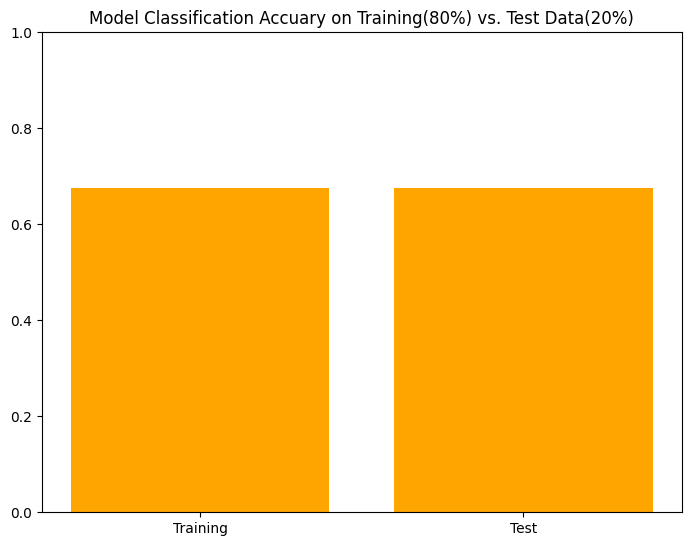

In [33]:
import matplotlib.pyplot as plt

# Train the model
NBmodel.fit(X_train1, y_train1)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train1, y_train1), NBmodel.score(X_test1, y_test1)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training(80%) vs. Test Data(20%)')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()


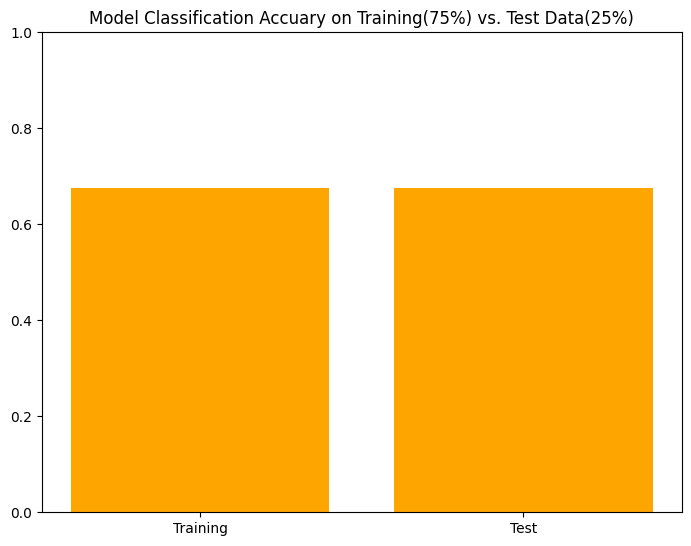

In [39]:
# Train the model
NBmodel2.fit(X_train2, y_train2)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel2.score(X_train2, y_train2), NBmodel2.score(X_test2, y_test2)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training(75%) vs. Test Data(25%)')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

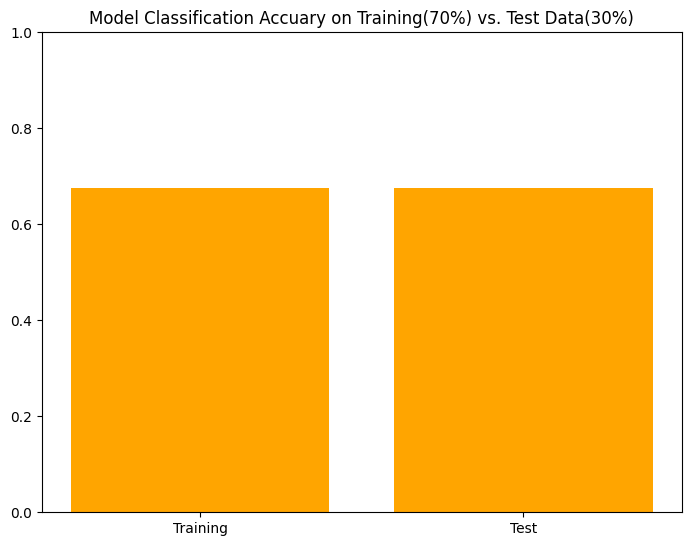

In [40]:
# Train the model
NBmodel3.fit(X_train3, y_train3)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel3.score(X_train3, y_train3), NBmodel3.score(X_test3, y_test3)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training(70%) vs. Test Data(30%)')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

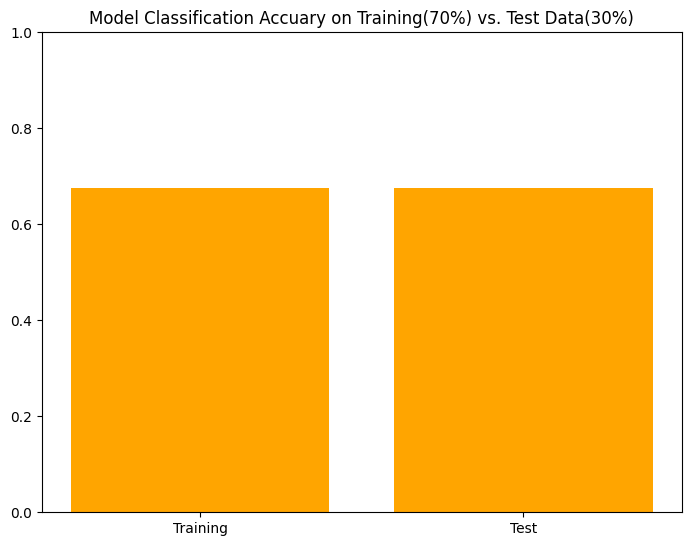

In [41]:
# Train the model
NBmodel4.fit(X_train4, y_train4)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel4.score(X_train4, y_train4), NBmodel4.score(X_test4, y_test4)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training(60%) vs. Test Data(40%)')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

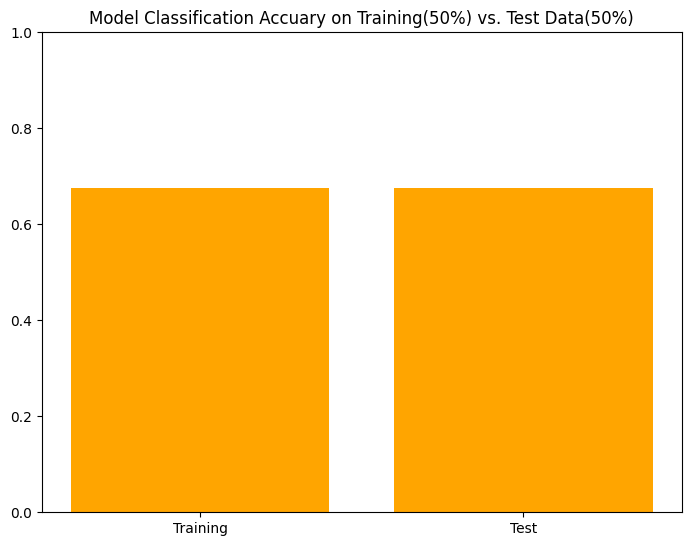

In [42]:
# Train the model
NBmodel5.fit(X_train5, y_train5)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel5.score(X_train5, y_train5), NBmodel5.score(X_test5, y_test5)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training(50%) vs. Test Data(50%)')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

10.Summarize your findings.

This notebook was very helpful in enforcing what we learned in class about Naiive Bayes and the probability calculations. I feel a lot more confidend about performing them by hand especially after doing Q7. As for the results of this project, I found that the change in training size really didn't effect the outcome of the model in any reasonable way. All results seemed to be very similar to each other. This does make some sence since in the Q7 problems we found that there was no big correlation between the data values present accept for p(Sugar_flag = Low ∣ Type = Red). This might explain why the model struggled to pick out what type of wine based on the attributes. As for the model I used I chose CategoricalNB since all of the data points listed in this set were categorical so it was the obvious choice in my opinon.